The purpose of this script is to plot data that was extracted from Tensorboard in a visually appealing way, while also allowing for more control over things like scaling, colours and saving of the resulting images

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [69]:
associative_retrieval = "accuracy_ar"
mnist28_first = "accuracy_mnist28_first"
mnist28_second = "accuracy_mnist28_second"
ptb_loss_first = "loss_ptb_1"
ptb_loss_second = "loss_ptb_2"
filename = mnist28_second
extension = ".csv"
df = pd.read_csv("../data/"+filename+extension, sep=";")

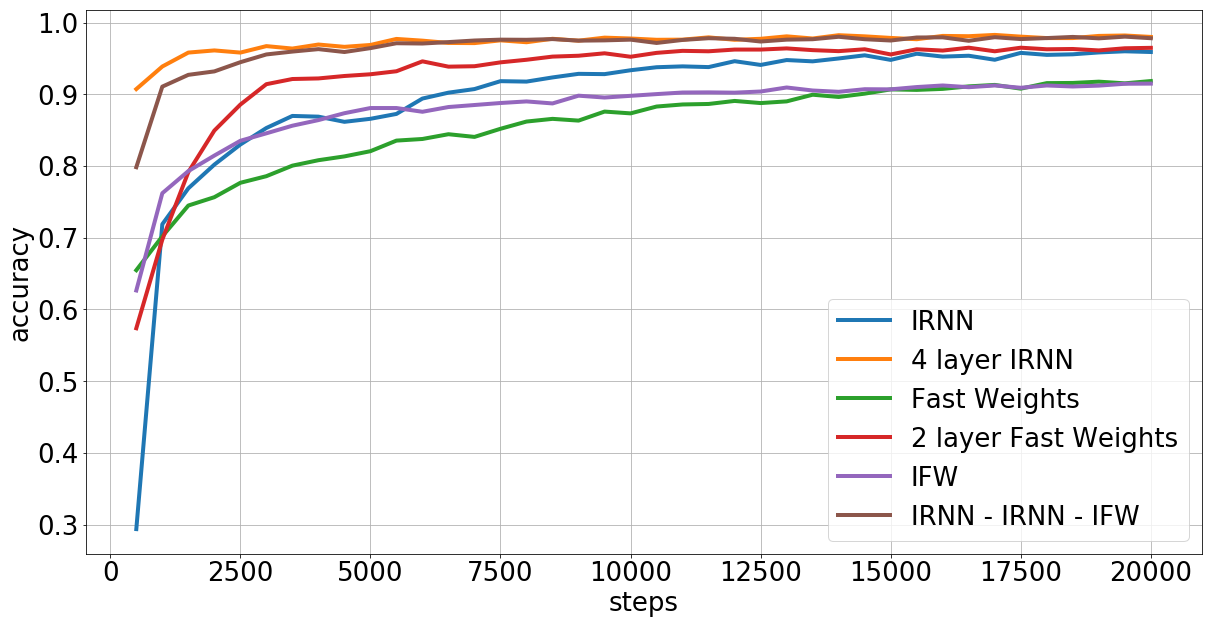

In [70]:
font = {'size'   : 26}

matplotlib.rc('font', **font)
fwcolor = '#2ca02c'
autocolor = '#2ca02c'
plt.figure(figsize=(20,10))
for col_name in list(df):
    if(col_name.lower() != 'step'):
        p = plt.plot(df['step'], df[col_name],label=col_name, linewidth=4.0)
        if(col_name == "Fast Weights"):
            fwcolor = p[0].get_color()
        if(col_name == "Autoconceptor"):
            autocolor = p[0].get_color()
            
fwcircle = matplotlib.patches.Ellipse((25000, 1.0), 1500, 0.04, color=fwcolor)
autocircle = matplotlib.patches.Ellipse((24500, 1.0), 1500, 0.04, color=autocolor)


plt.grid(which='both')
plt.xlabel("steps")
if(filename in [associative_retrieval, mnist28_first, mnist28_second]):
    plt.ylabel("accuracy")
else:
    plt.ylabel("loss")
plt.legend()
if(filename == associative_retrieval):
    print("should print")
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_artist(fwcircle)
    ax.add_artist(autocircle)
plt.savefig("../plots/"+filename+".png")
plt.show()